
# ENEL 645 Assignment 2

### Stephen Moore, Winter 2025

Imports:

In [5]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Set device; check if GPU is available

print("Device: ", device) 

Device:  cpu


Paths:

In [7]:
TRAIN_PATH = f"/work/souza_lab/garbage_data/CVPR_2024_dataset_Train"
VAL_PATH = f"/work/souza_lab/garbage_data/CVPR_2024_dataset_Val"
TEST_PATH = f"/work/souza_lab/garbage_data/CVPR_2024_dataset_Test"

Dataset information for images:

In [8]:
# Transforms 
torchvision_transform = transforms.Compose([transforms.Resize((224,224)),\
    transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip(),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406] ,std=[0.229, 0.224, 0.225] )])


torchvision_transform_test = transforms.Compose([transforms.Resize((224,224)),\
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406] ,std=[0.229, 0.224, 0.225])])

Dataset information for text:

In [9]:
from transformers import DistilBertTokenizer

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize data
max_len = 24

Full combined dataset and dataset example:

In [10]:
from Datasets.Dataset import GarbageDataset # Custom made dataset, built on top of ImageFolder

train_dataset = GarbageDataset(
    root = TRAIN_PATH, tokenizer = tokenizer, max_len = max_len, transform = torchvision_transform, 
)

In [11]:
class_names = train_dataset.classes
print(class_names)

['Black', 'Blue', 'Green', 'TTR']


In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [13]:
train_iterator = iter(train_dataloader)
train_batch = next(train_iterator)

print(train_batch.keys())


dict_keys(['image', 'text', 'input_ids', 'attention_mask', 'label'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


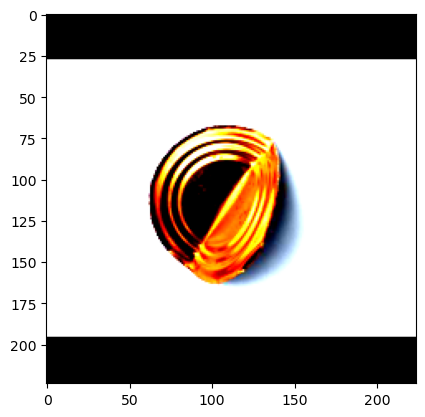

metal 
tensor(1)
tensor([ 101, 3384,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])


In [15]:
plt.imshow(train_batch['image'][8].permute(1, 2, 0))
plt.show()
print(train_batch['text'][8])
print(train_batch['label'][8])
print(train_batch['input_ids'][8])

For training and testing scripts ... see training.py, testing.py (and their outputs in training.out and testing.out)

Performance evaluation:

In [18]:
import torch
import seaborn as sns
from sklearn.metrics import confusion_matrix

[[521  85  21  68]
 [ 62 968  34  22]
 [ 27  25 738   9]
 [ 71  72  15 694]]


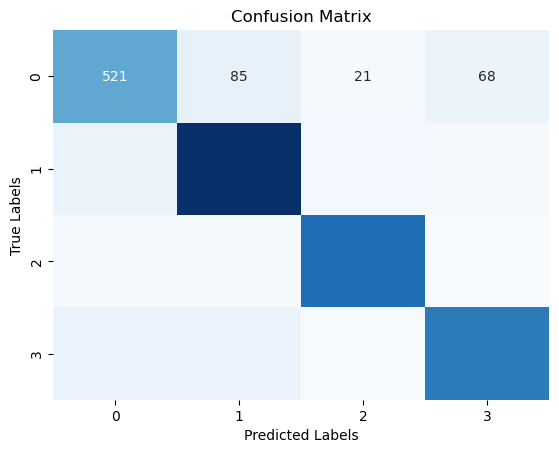

In [24]:
predictions = torch.load('predictions.pth')
labels = torch.load('labels.pth')

cm = confusion_matrix(labels, predictions)

print(cm)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

(... not sure why the squares are not displaying the number ... see the print output above them to confirm the numbers)

Accuracy:

In [42]:
# Calculate accuracy
num_correct = sum([predictions == labels for predictions, labels in zip(predictions, labels)])
accuracy = num_correct / len(predictions)
print(f'Accuracy on test set: {accuracy:.3f} ({accuracy * 100:.2f}%)')

Accuracy on test set: 0.851 (85.11%)
